In [9]:
import pandas as pd

# Load the dataset
file_path = 'HeartDisease.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
binary_col = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Fill missing values in binary_col with the mode of each column
for col in binary_col:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing values in the rest of the columns with the mean
for col in data.columns:
    if col not in binary_col:
        data[col] = data[col].fillna(data[col].mean())
# Extracting the data (cleaned data is already in 'data' variable)
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values



***A)***

In [11]:
import numpy as np
def train_validation_test_split(X, y, train_size=0.70, val_size=0.15):
    total_size = X.shape[0]
    
    # Calculate the number of samples for each set
    train_end = int(train_size * total_size)
    val_end = int(val_size * total_size) + train_end
    
    # Shuffle the indices
    indices = np.random.permutation(total_size)
    
    # Split the data according to the calculated indices
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]
    
    return X[train_indices], y[train_indices], X[val_indices], y[val_indices], X[test_indices], y[test_indices]

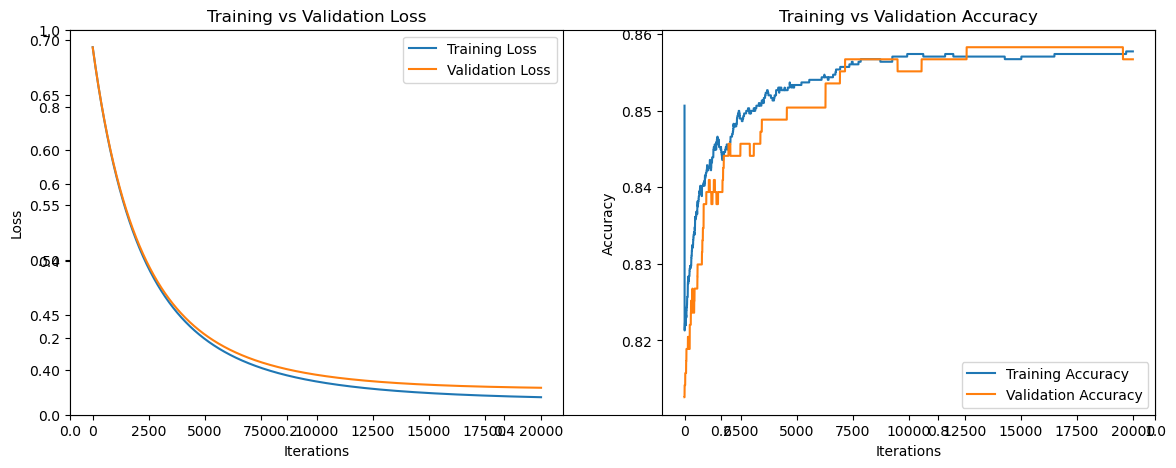

Test Accuracy: 83.52%


In [12]:

import matplotlib.pyplot as plt
def standard_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#loss function to calculate losses
def lossfunction(y,y_pred):
    m=y.shape[0]
    eps=1e-9#to avoid log(0)
    loss =-(1 / m) * np.sum(y * np.log(y_pred+eps) + (1 - y) * np.log(1 - y_pred+eps))
    return loss
def gradient(X,y,y_pred):
    m, n = X.shape
    # Compute the gradient for weights and bias
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    return dw,db
# Logistic regression model with batch gradient descent
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Function to make predictions
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(linear_model)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]
    return np.array(y_pred)
def logistic_regression1(X, y, X_val, y_val, lr=0.01, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []
    
    for i in range(num_iterations):
        # Forward pass: Compute predictions for training data
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        dw,db=gradient(X,y,y_pred)
        # Update the weights and bias using gradient descent
        weights -= lr * dw
        bias -= lr * db
        # Compute the training loss (Binary Cross Entropy)
        loss = lossfunction(y,y_pred)
        training_losses.append(loss)
        # Compute the validation predictions and loss
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)
        val_loss = lossfunction(y_val,y_val_pred)
        validation_losses.append(val_loss)
        
        # Compute accuracies
        y_pred_label = np.where(y_pred > 0.5, 1, 0)
        y_val_pred_label = np.where(y_val_pred > 0.5, 1, 0)
    
        training_accuracies.append(np.mean(y_pred_label == y))
        validation_accuracies.append(np.mean(y_val_pred_label == y_val))
    
    return weights, bias, training_losses, validation_losses, training_accuracies, validation_accuracies

# Plotting the metrics
def plot_metrics(training_losses, validation_losses, training_accuracies, validation_accuracies, tile=""):
    iterations = range(len(training_losses))
    
    plt.figure(figsize=(14, 5))
    plt.title(tile)
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(iterations, training_losses, label='Training Loss')
    plt.plot(iterations, validation_losses, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(iterations, training_accuracies, label='Training Accuracy')
    plt.plot(iterations, validation_accuracies, label='Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    
    plt.show()



Xss = standard_scale(X)
# Split the data into train, validation, and test sets
X_train, y_train, X_val, y_val, X_test, y_test = train_validation_test_split(Xss, y, train_size=0.70, val_size=0.15)
#Normalize features

# Train the logistic regression model
weights, bias, training_losses, validation_losses, training_accuracies, validation_accuracies = logistic_regression1(
    X_train, y_train, X_val, y_val, lr=0.001, num_iterations=20000)

# Plot the results
plot_metrics(training_losses, validation_losses, training_accuracies, validation_accuracies)

# Final test accuracy
y_test_pred = sigmoid(np.dot(X_test, weights) + bias)
y_test_pred_label = np.where(y_test_pred > 0.5, 1, 0)
test_accuracy = np.mean(y_test_pred_label == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


**(B)**

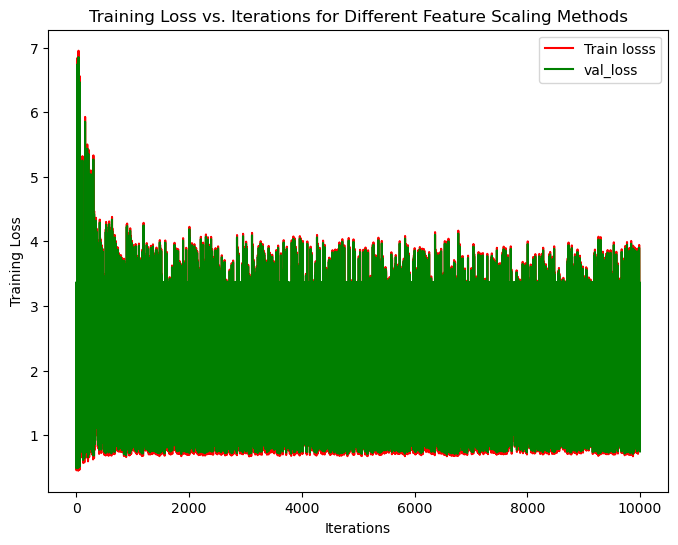

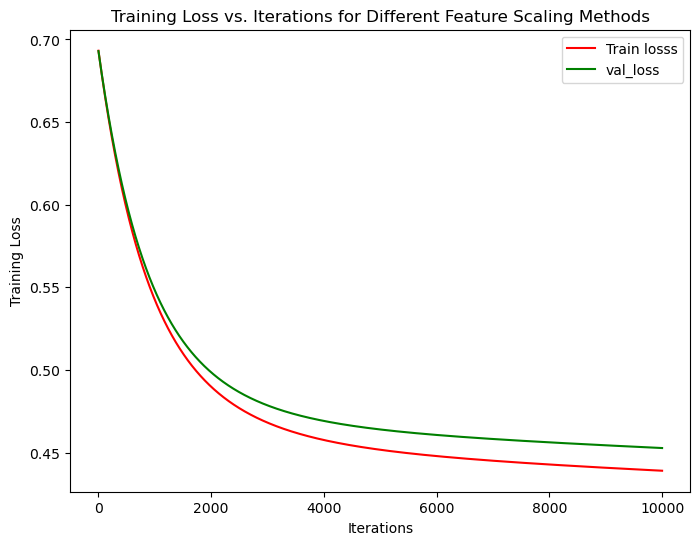

In [19]:
# Min-max scaling
def min_max_scale(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    return (X - min_val) / (max_val - min_val)

# Plotting the training loss
def plot_training_loss(train_loss, val_loss,tile):
    iterations = range(len(train_loss))
    
    plt.figure(figsize=(8, 6))
    plt.title(tile)
    # Plot training losses for different scaling methods
    plt.plot(iterations, train_loss, label='Train losss', color='r')
    plt.plot(iterations, val_loss, label='val_loss', color='g')
    
    
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs. Iterations for Different Feature Scaling Methods')
    plt.legend()
    plt.show()

# Split the data into train and validation sets (since we are only interested in training losses)
X_train_nn, y_train_nn, X_val_nn, y_val_nn, _, _ = train_validation_test_split(X, y, train_size=0.70, val_size=0.15)

# Case 1: No scaling
weights_no_scaling, bias_no_scaling, train_loss_no_scaling,val_loss_no_scaling,_,_ = logistic_regression1(X_train_nn, y_train_nn,X_val_nn,y_val_nn ,lr=0.001, num_iterations=10000)

# Case 2: Min-max scaling
# Split the data into train and validation sets (since we are only interested in training losses)
X_train_minmax = min_max_scale(X)
X_train_mm, y_train_mm, X_val_mm, y_val_mm, _, _ = train_validation_test_split(X_train_minmax, y, train_size=0.70, val_size=0.15)

weights_minmax, bias_minmax, train_loss_mm,val_loss_mm,_,_= logistic_regression1(X_train_mm, y_train_mm,X_val_mm,y_val_mm , lr=0.001, num_iterations=10000)


# Plot the results
plot_training_loss(train_loss_no_scaling,val_loss_no_scaling,"NO scaling")
plot_training_loss(train_loss_mm,val_loss_mm,"minmax scaling")

**(C)**

In [20]:

def standard_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
# Logistic regression model with batch gradient descent
def logistic_regression3(X, y, lr=0.01, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    
    for i in range(num_iterations):
        # Forward pass: Compute predictions for training data
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute the gradient for weights and bias
        dw,db=gradient(X,y,y_pred)
        
        # Update the weights and bias using gradient descent
        weights -= lr * dw
        bias -= lr * db
    
    return weights, bias

# Make predictions
def predict(X, weights, bias, threshold=0.5):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.where(y_pred >= threshold, 1, 0), y_pred

# Calculate the confusion matrix manually
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

# Calculate precision, recall, F1 score manually
def precision_manual(TP, FP):
    return TP / (TP + FP) if (TP + FP) != 0 else 0

def recall_manual(TP, FN):
    return TP / (TP + FN) if (TP + FN) != 0 else 0

def f1_score_manual(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Calculate ROC-AUC manually
def roc_auc_manual(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)
    tpr_values = []
    fpr_values = []

    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0  # True positive rate
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0  # False positive rate

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    # Calculate the AUC (Area Under Curve)
    auc = -np.trapz(tpr_values, fpr_values)  # Trapezoidal rule
    return auc

# Normalize features

X_normalized = standard_scale(X)

# Train the logistic regression model
weights, bias = logistic_regression3(X_train, y_train, lr=0.0001, num_iterations=10000)

# Make predictions on the validation set
y_val_pred, y_val_prob = predict(X_val, weights, bias,0.5)

# Compute confusion matrix
conf_matrix = confusion_matrix_manual(y_val, y_val_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate precision, recall, F1 score
precision = precision_manual(TP, FP)
recall = recall_manual(TP, FN)
f1 = f1_score_manual(precision, recall)

# Calculate ROC-AUC score
roc_auc = roc_auc_manual(y_val, y_val_prob)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")



Confusion Matrix:
[[520  22]
 [ 80  13]]
Precision: 0.37
Recall: 0.14
F1 Score: 0.20
ROC-AUC Score: 0.69


**(D)**

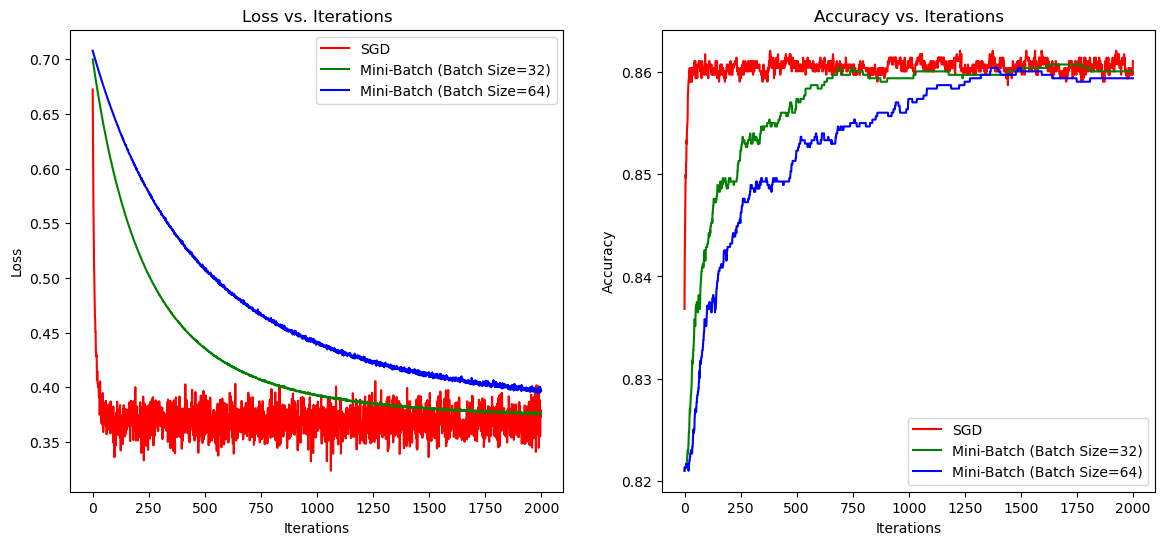

In [21]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, lr=0.01, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []
    accuracies = []
    
    for i in range(num_iterations):
        total_loss = 0
        for j in range(m):
            idx = np.random.randint(m)  # Randomly select a sample
            X_i = X[idx].reshape(1, -1)
            y_i = y[idx]
            
            # Forward pass
            linear_model = np.dot(X_i, weights) + bias
            y_pred = sigmoid(linear_model)
            
            # Loss
            loss = -(y_i * np.log(y_pred) + (1 - y_i) * np.log(1 - y_pred))
            total_loss += loss
            
            # Gradient computation
            dw = X_i.T * (y_pred - y_i)
            db = y_pred - y_i
            
            # Update weights and bias
            weights -= lr * dw.flatten()
            bias -= lr * db
        
        # Store total loss and accuracy at each iteration
        losses.append(total_loss / m)
        y_pred_full, _ = predict(X, weights, bias)
        accuracies.append(accuracy(y, y_pred_full))
    
    return weights, bias, losses, accuracies

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, lr=0.01, num_iterations=1000, batch_size=32):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []
    accuracies = []
    
    for i in range(num_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        total_loss = 0
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            
            # Forward pass
            linear_model = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(linear_model)
            
            # Loss
            loss = -(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred)).mean()
            total_loss += loss
            
            # Gradient computation
            dw = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / batch_size) * np.sum(y_pred - y_batch)
            
            # Update weights and bias
            weights -= lr * dw
            bias -= lr * db
        
        # Store total loss and accuracy at each iteration
        losses.append(total_loss / (m // batch_size))
        y_pred_full, _ = predict(X, weights, bias)
        accuracies.append(accuracy(y, y_pred_full))
    
    return weights, bias, losses, accuracies

# Plotting loss and accuracy
def plot_loss_accuracy(losses_sgd, losses_mb32,losses_mb64, acc_sgd, acc_mb32,acc_mb64):
    iterations = range(len(losses_sgd))
    
    plt.figure(figsize=(14, 6))
    
    # Loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(iterations, losses_sgd, label='SGD', color='r')
    plt.plot(iterations, losses_mb32, label=f'Mini-Batch (Batch Size=32)', color='g')
    plt.plot(iterations, losses_mb64, label=f'Mini-Batch (Batch Size=64)', color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs. Iterations')
    plt.legend()
    
    # Accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(iterations, acc_sgd, label='SGD', color='r')
    plt.plot(iterations, acc_mb32, label=f'Mini-Batch (Batch Size=32)', color='g')
    plt.plot(iterations, acc_mb64, label=f'Mini-Batch (Batch Size=64)', color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Iterations')
    plt.legend()
    
    plt.show()


X_normalized = standard_scale(X)

# Split the data into train, validation, and test sets
X_train, y_train, X_val, y_val, X_test, y_test= train_validation_test_split(X_normalized, y, train_size=0.70, val_size=0.15)

# Train using Stochastic Gradient Descent (SGD)
weights_sgd, bias_sgd, losses_sgd, accuracies_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.0001, num_iterations=2000)

# Train using Mini-Batch Gradient Descent with batch size 32
weights_mb32, bias_mb32, losses_mb32, accuracies_mb32 = mini_batch_gradient_descent(X_train, y_train, lr=0.0001, num_iterations=2000, batch_size=32)

# Train using Mini-Batch Gradient Descent with batch size 64
weights_mb64, bias_mb64, losses_mb64, accuracies_mb64 = mini_batch_gradient_descent(X_train, y_train, lr=0.0001, num_iterations=2000, batch_size=64)

# Plot the results for batch size 32
plot_loss_accuracy(losses_sgd, losses_mb32,losses_mb64, accuracies_sgd, accuracies_mb32,accuracies_mb64)




**(E)**

In [261]:


def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(linear_model)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]
    return np.array(y_pred)
def accuracy_manual(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

# K-Fold Cross-Validation function
def k_fold_cross_validation(X, y, k=5, lr=0.01, num_iterations=1000):
    n_samples = len(y)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Define fold sizes
    fold_sizes = [n_samples // k] * k
    for i in range(n_samples % k):
        fold_sizes[i] += 1

    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append(indices[start:stop])
        current = stop

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for i in range(k):
        # Split data into training and validation sets
        val_indices = folds[i]
        train_indices = np.hstack(folds[:i] + folds[i+1:])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        # Train logistic regression model
        weights, bias = logistic_regression3(X_train, y_train, lr=lr, num_iterations=num_iterations)

        # Make predictions on validation set
        y_val_pred = predict(X_val, weights, bias)

        # Calculate confusion matrix and metrics
        TN, FP, FN, TP = confusion_matrix_manual(y_val, y_val_pred).ravel()
        precision = precision_manual(TP, FP)
        recall = recall_manual(TP, FN)
        f1 = f1_score_manual(precision, recall)
        accuracy = accuracy_manual(TP, TN, FP, FN)

        # Store metrics
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate average and standard deviation
    metrics = {
        'accuracy': (np.mean(accuracies), np.std(accuracies)),
        'precision': (np.mean(precisions), np.std(precisions)),
        'recall': (np.mean(recalls), np.std(recalls)),
        'f1_score': (np.mean(f1_scores), np.std(f1_scores))
    }

    return metrics

X_normalized = standard_scale(X)

# Perform 5-fold cross-validation
metrics = k_fold_cross_validation(X_normalized, y, k=5, lr=0.001, num_iterations=10000)

# Report the overall results
print("Average Metrics Across Folds:")
print(f"Accuracy: {metrics['accuracy'][0]:.4f} ± {metrics['accuracy'][1]:.4f}")
print(f"Precision: {metrics['precision'][0]:.4f} ± {metrics['precision'][1]:.4f}")
print(f"Recall: {metrics['recall'][0]:.4f} ± {metrics['recall'][1]:.4f}")
print(f"F1 Score: {metrics['f1_score'][0]:.4f} ± {metrics['f1_score'][1]:.4f}")


Average Metrics Across Folds:
Accuracy: 0.8535 ± 0.0048
Precision: 0.7133 ± 0.1343
Recall: 0.0621 ± 0.0109
F1 Score: 0.1140 ± 0.0191


**(F)**

Early stopping at epoch 3422


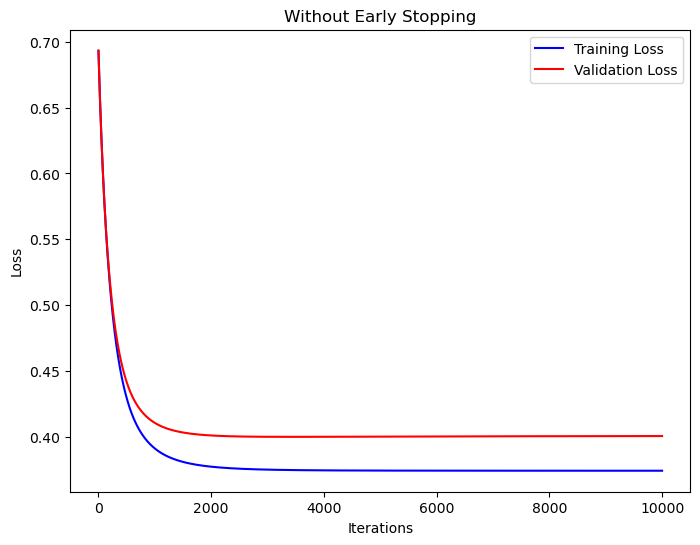

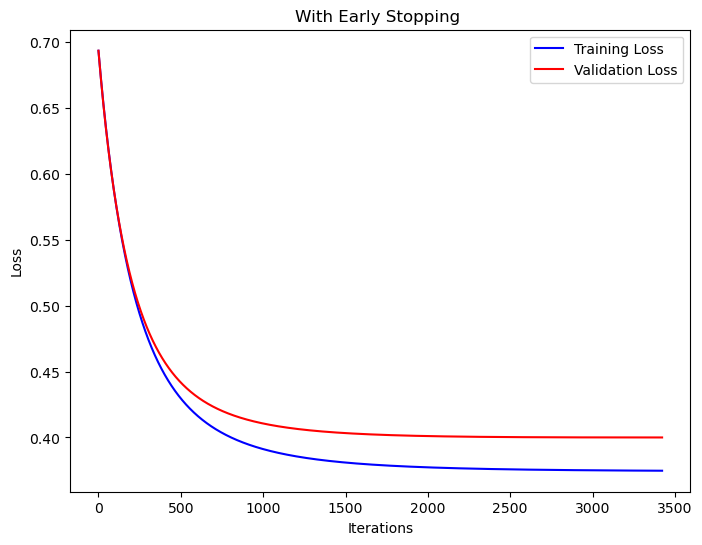

In [274]:
# Function to compute regularized loss
def compute_loss(X, y, weights, bias, l1_reg=0.0, l2_reg=0.0):
    m = X.shape[0]
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    loss = lossfunction(y, y_pred)
    
    # Regularization terms
    l1_loss = l1_reg * np.sum(np.abs(weights))
    l2_loss = l2_reg * np.sum(weights ** 2)
    total_loss = loss + l1_loss + l2_loss
    
    return loss, total_loss


# Logistic regression with early stopping
def gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, lr=0.01, num_iterations=1000, 
                                         l1_reg=0.0, l2_reg=0.0, patience=10):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0
    
    training_losses = []
    validation_losses = []
    best_val_loss = np.inf
    no_improvement_epochs = 0
    best_weights = None
    best_bias = None
    
    for i in range(num_iterations):
        # Forward pass
        linear_model = np.dot(X_train, weights) + bias
        y_pred_train = sigmoid(linear_model)
        
        # Compute training loss (with regularization)
        _, training_loss = compute_loss(X_train, y_train, weights, bias, l1_reg, l2_reg)
        training_losses.append(training_loss)
        
        # Compute validation loss (without regularization)
        validation_loss, _ = compute_loss(X_val, y_val, weights, bias)
        validation_losses.append(validation_loss)
        
        # Early stopping: Check if validation loss improves
        if validation_loss < best_val_loss:
            best_val_loss = validation_loss
            best_weights = np.copy(weights)
            best_bias = bias
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1
        
        if no_improvement_epochs >= patience:
            print(f"Early stopping at epoch {i}")
            break
        
        # Compute gradients (with regularization)
        dw = (1 / m) * np.dot(X_train.T, (y_pred_train - y_train))
        db = (1 / m) * np.sum(y_pred_train - y_train)
        
        # Add regularization to gradients
        dw += l1_reg * np.sign(weights) + 2 * l2_reg * weights
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db
    
    # Return best weights and bias (those with lowest validation loss)
    return best_weights, best_bias, training_losses, validation_losses



# Plot training and validation loss
def plot_loss(training_losses, validation_losses, title):
    iterations = range(len(training_losses))
    plt.figure(figsize=(8, 6))
    plt.plot(iterations, training_losses, label='Training Loss', color='b')
    plt.plot(iterations, validation_losses, label='Validation Loss', color='r')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Extracting the data (cleaned data is already in 'data' variable)
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values
X_normalized = standard_scale(X)

# Split the data into train and validation sets
X_train, y_train, X_val, y_val, _, _ = train_validation_test_split(X_normalized, y, train_size=0.70, val_size=0.15)

# Train with early stopping and L2 regularization (ridge)
weights_es_l2, bias_es_l2, training_losses_es_l2, validation_losses_es_l2 = gradient_descent_with_early_stopping(
    X_train, y_train, X_val, y_val, lr=0.01, num_iterations=10000, patience=10)

# Train without early stopping for comparison (normal gradient descent)
weights_normal, bias_normal, training_losses_normal, validation_losses_normal = gradient_descent_with_early_stopping(
    X_train, y_train, X_val, y_val, lr=0.01, num_iterations=10000, patience=10000)  # No early stopping

# Plot results for early stopping vs no early stopping
plot_loss(training_losses_normal, validation_losses_normal, "Without Early Stopping")
plot_loss(training_losses_es_l2, validation_losses_es_l2, "With Early Stopping ")
